In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Patients_Data.csv to Patients_Data.csv


In [3]:
df=pd.read_csv("Patients_Data.csv")
df.head()

,ICMR NO,Cr. No.,NAME,AGE,PARITY,Unnamed: 5,h/o htn,P,L,A,...,RI-L,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml),Result
0,1,16448.0,SEEMA,22.0,G3P0L0A2,NaN,NaN,0.0,0.0,2.0,...,0.58,0.74,0.66,3.80,2.30,0.0,0.0,10.000,17.3,0
1,2,16405.0,ASHA,24.0,G2P1L1A0,NaN,NaN,1.0,1.0,0.0,...,0.63,0.63,0.62,2.50,2.70,0.0,0.0,7.330,53.0,0
2,3,16457.0,SHAKSHI,28.0,Primi,NaN,NaN,0.0,0.0,0.0,...,0.81,0.81,0.78,3.78,5.34,1.0,1.0,2.710,29.7,0
3,4,16549.0,BATERI,19.0,Primi,0.0,NaN,0.0,0.0,0.0,...,0.57,0.66,0.62,2.98,2.35,0.0,0.0,1.640,64.9,2
4,5,16553.0,ANU,19.0,Primi,0.0,NaN,0.0,0.0,0.0,...,0.58,0.64,0.61,2.70,2.35,1.0,0.0,0.915,21.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ICMR NO           1038 non-null   int64  
 1   Cr. No.           1022 non-null   float64
 2   NAME              1038 non-null   object 
 3   AGE               1037 non-null   float64
 4   PARITY            1030 non-null   object 
 5   Unnamed: 5        220 non-null    float64
 6   h/o htn           50 non-null     float64
 7   P                 1031 non-null   float64
 8   L                 1031 non-null   float64
 9   A                 1027 non-null   float64
 10  WEIGHT            1038 non-null   float64
 11  HEIGHT in Metres  1038 non-null   float64
 12  BMI               1038 non-null   float64
 13  BP-Sys            1038 non-null   int64  
 14  BP-Dia            1038 non-null   int64  
 15  MAP               1038 non-null   float64
 16  CRL               1038 non-null   float64


In [5]:
df.isnull().sum()

ICMR NO               0
Cr. No.              16
NAME                  0
AGE                   1
PARITY                8
Unnamed: 5          818
h/o htn             988
P                     7
L                     7
A                    11
WEIGHT                0
HEIGHT in Metres      0
BMI                   0
BP-Sys                0
BP-Dia                0
MAP                   0
CRL                   0
NT                    0
BPD                   0
PI-R                  0
PI-L                  1
H-PI                  0
M-PI                  0
RI-R                  0
RI-L                  1
H-RI                  0
M-RI                  0
SD -R                 0
SD-L                  0
N-R                   2
N-L                   2
PAPP-A(mlU/ml)        0
F B-hCG (ng/ml)       3
Result                0
dtype: int64

# Data Preprocessing

In [6]:
df=df.drop(labels=["Cr. No.","Unnamed: 5","h/o htn","NAME "],axis=1)

In [7]:
df.head()

,ICMR NO,AGE,PARITY,P,L,A,WEIGHT,HEIGHT in Metres,BMI,BP-Sys,...,RI-L,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml),Result
0,1,22.0,G3P0L0A2,0.0,0.0,2.0,49.0,1.58,19.6,123,...,0.58,0.74,0.66,3.80,2.30,0.0,0.0,10.000,17.3,0
1,2,24.0,G2P1L1A0,1.0,1.0,0.0,43.0,1.57,17.4,138,...,0.63,0.63,0.62,2.50,2.70,0.0,0.0,7.330,53.0,0
2,3,28.0,Primi,0.0,0.0,0.0,60.0,1.54,25.3,140,...,0.81,0.81,0.78,3.78,5.34,1.0,1.0,2.710,29.7,0
3,4,19.0,Primi,0.0,0.0,0.0,55.0,1.58,22.0,116,...,0.57,0.66,0.62,2.98,2.35,0.0,0.0,1.640,64.9,2
4,5,19.0,Primi,0.0,0.0,0.0,43.0,1.59,17.0,116,...,0.58,0.64,0.61,2.70,2.35,1.0,0.0,0.915,21.4,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le_parity = LabelEncoder()
df['Parity_n'] = le_parity.fit_transform(df['PARITY'])

In [9]:
df=df.drop(labels="PARITY",axis=1)
df.head()

,ICMR NO,AGE,P,L,A,WEIGHT,HEIGHT in Metres,BMI,BP-Sys,BP-Dia,...,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml),Result,Parity_n
0,1,22.0,0.0,0.0,2.0,49.0,1.58,19.6,123,64,...,0.74,0.66,3.80,2.30,0.0,0.0,10.000,17.3,0,11
1,2,24.0,1.0,1.0,0.0,43.0,1.57,17.4,138,65,...,0.63,0.62,2.50,2.70,0.0,0.0,7.330,53.0,0,6
2,3,28.0,0.0,0.0,0.0,60.0,1.54,25.3,140,67,...,0.81,0.78,3.78,5.34,1.0,1.0,2.710,29.7,0,54
3,4,19.0,0.0,0.0,0.0,55.0,1.58,22.0,116,59,...,0.66,0.62,2.98,2.35,0.0,0.0,1.640,64.9,2,54
4,5,19.0,0.0,0.0,0.0,43.0,1.59,17.0,116,59,...,0.64,0.61,2.70,2.35,1.0,0.0,0.915,21.4,0,54


In [10]:
df.isnull().sum()

ICMR NO              0
AGE                  1
P                    7
L                    7
A                   11
WEIGHT               0
HEIGHT in Metres     0
BMI                  0
BP-Sys               0
BP-Dia               0
MAP                  0
CRL                  0
NT                   0
BPD                  0
PI-R                 0
PI-L                 1
H-PI                 0
M-PI                 0
RI-R                 0
RI-L                 1
H-RI                 0
M-RI                 0
SD -R                0
SD-L                 0
N-R                  2
N-L                  2
PAPP-A(mlU/ml)       0
F B-hCG (ng/ml)      3
Result               0
Parity_n             0
dtype: int64

In [11]:
df['AGE'].fillna(df['AGE'].mode()[0],inplace=True)
df['P'].fillna(df['P'].mode()[0],inplace=True)
df['L'].fillna(df['L'].mode()[0],inplace=True)
df['A'].fillna(df['A'].mode()[0],inplace=True)
df['N-R'].fillna(df['N-R'].mode()[0],inplace=True)
df['N-L'].fillna(df['N-L'].mode()[0],inplace=True)
df['PI-L'].fillna(df['PI-L'].mean(),inplace=True)
df['RI-L'].fillna(df['RI-L'].mean(),inplace=True)
df['F B-hCG (ng/ml)'].fillna(df['F B-hCG (ng/ml)'].mean(),inplace=True)

In [12]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ICMR NO           1038 non-null   int64  
 1   AGE               1038 non-null   float64
 2   P                 1038 non-null   float64
 3   L                 1038 non-null   float64
 4   A                 1038 non-null   float64
 5   WEIGHT            1038 non-null   float64
 6   HEIGHT in Metres  1038 non-null   float64
 7   BMI               1038 non-null   float64
 8   BP-Sys            1038 non-null   int64  
 9   BP-Dia            1038 non-null   int64  
 10  MAP               1038 non-null   float64
 11  CRL               1038 non-null   float64
 12  NT                1038 non-null   float64
 13  BPD               1038 non-null   float64
 14  PI-R              1038 non-null   float64
 15  PI-L              1038 non-null   float64
 16  H-PI              1038 non-null   float64


In [13]:
df=df.drop(labels="ICMR NO",axis=1)
df

,AGE,P,L,A,WEIGHT,HEIGHT in Metres,BMI,BP-Sys,BP-Dia,MAP,...,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml),Result,Parity_n
0,22.0,0.0,0.0,2.0,49.0,1.58,19.6,123,64,83.7,...,0.74,0.66,3.80,2.30,0.0,0.0,10.000,17.30,0,11
1,24.0,1.0,1.0,0.0,43.0,1.57,17.4,138,65,89.3,...,0.63,0.62,2.50,2.70,0.0,0.0,7.330,53.00,0,6
2,28.0,0.0,0.0,0.0,60.0,1.54,25.3,140,67,91.3,...,0.81,0.78,3.78,5.34,1.0,1.0,2.710,29.70,0,54
3,19.0,0.0,0.0,0.0,55.0,1.58,22.0,116,59,78.0,...,0.66,0.62,2.98,2.35,0.0,0.0,1.640,64.90,2,54
4,19.0,0.0,0.0,0.0,43.0,1.59,17.0,116,59,78.0,...,0.64,0.61,2.70,2.35,1.0,0.0,0.915,21.40,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,23.0,0.0,0.0,0.0,44.8,1.59,17.7,120,76,90.7,...,0.91,0.85,11.42,4.80,1.0,1.0,9.220,16.80,0,54
1034,20.0,0.0,0.0,0.0,42.8,1.56,17.6,140,78,98.7,...,0.76,0.73,3.18,4.11,1.0,0.0,1.970,22.20,1,54
1035,21.0,0.0,0.0,0.0,45.8,1.57,18.6,115,65,81.7,...,0.95,0.88,4.97,8.40,0.0,1.0,3.660,8.69,0,54
1036,27.0,1.0,1.0,0.0,58.8,1.58,23.6,119,64,82.3,...,0.42,0.42,1.72,1.71,0.0,1.0,10.000,24.30,0,6


# Data Visualization

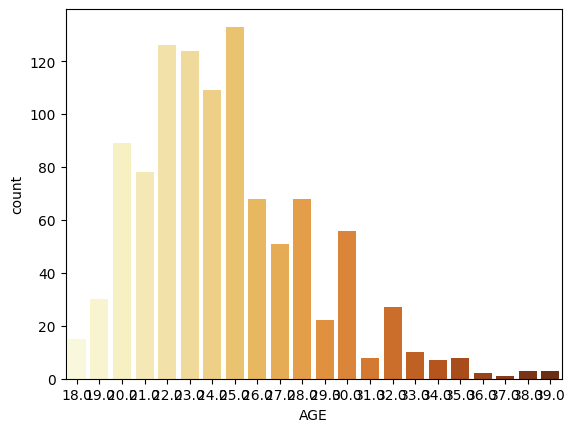

In [14]:
df.AGE.value_counts(dropna=False)
sns.countplot(x="AGE", data=df, palette="YlOrBr")
plt.show()

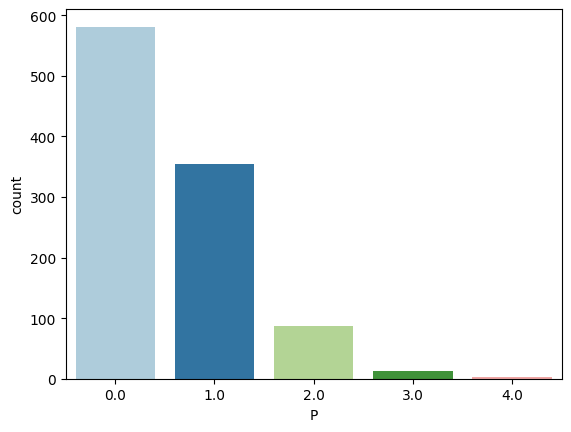

In [15]:
df.P.value_counts(dropna=False)
sns.countplot(x="P", data=df, palette="Paired")
plt.show()

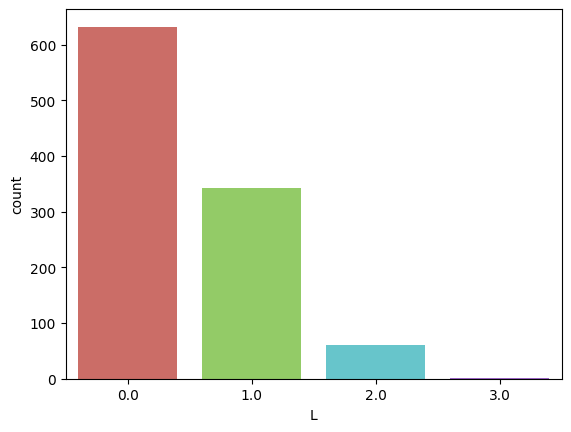

In [16]:
df.L.value_counts(dropna=False)
sns.countplot(x="L", data=df, palette="hls")
plt.show()

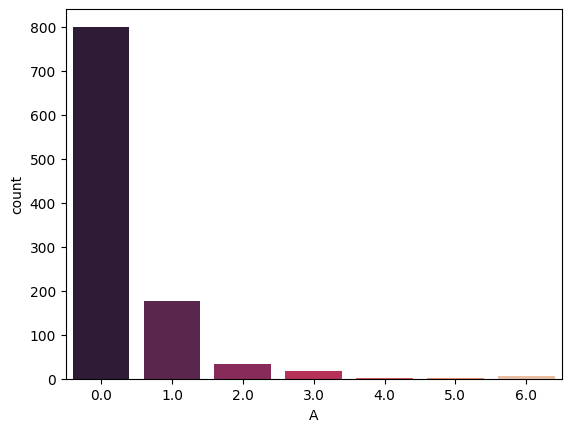

In [17]:
df.A.value_counts(dropna=False)
sns.countplot(x="A", data=df, palette="rocket")
plt.show()

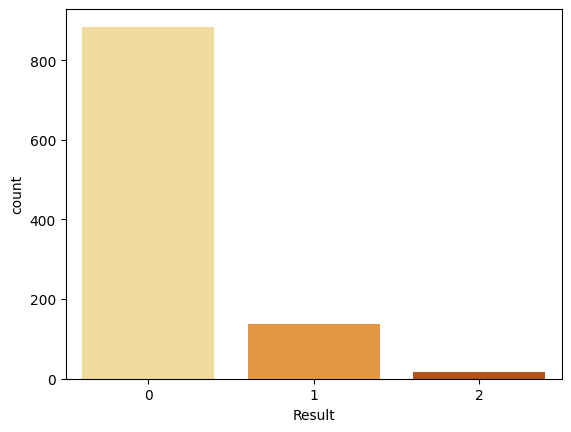

In [18]:
df.Result.value_counts(dropna=False)
sns.countplot(x="Result", data=df, palette="YlOrBr")
plt.show()

# Data Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Result'], axis=1),
    df['Result'],
    test_size=0.2,
    random_state=0)

In [20]:
X_train.head()

,AGE,P,L,A,WEIGHT,HEIGHT in Metres,BMI,BP-Sys,BP-Dia,MAP,...,RI-L,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml),Parity_n
821,27.0,0.0,0.0,0.0,65.0,1.51,28.5,113,76,88.3,...,0.66,0.79,0.73,4.76,2.96,1.0,1.0,10.00,54.3,54
695,25.0,0.0,0.0,0.0,42.0,1.58,16.8,101,57,71.7,...,0.82,0.82,0.81,5.01,5.69,1.0,1.0,10.00,36.5,54
478,23.0,0.0,0.0,0.0,40.0,1.54,16.9,91,60,70.3,...,0.87,0.87,0.77,3.05,7.56,1.0,0.0,10.00,29.5,54
144,24.0,0.0,0.0,0.0,45.0,1.53,19.2,102,62,75.3,...,0.84,0.84,0.79,3.68,6.13,1.0,1.0,8.17,13.0,54
804,18.0,0.0,0.0,0.0,45.5,1.55,18.9,97,52,67.0,...,0.67,0.73,0.70,3.66,3.02,0.0,0.0,8.28,49.5,54


# Features Importances(Selection)

In [21]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.0137471 , 0.00272403, 0.04115788,
       0.        , 0.04253251, 0.04360522, 0.03703911, 0.03342651,
       0.01834841, 0.        , 0.        , 0.00690492, 0.01220981,
       0.        , 0.        , 0.00051687, 0.02746745, 0.        ,
       0.        , 0.        , 0.01366141, 0.        , 0.00550323,
       0.05200545, 0.        , 0.00185917])

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

PAPP-A(mlU/ml)      0.052005
BP-Sys              0.043605
BMI                 0.042533
WEIGHT              0.041158
BP-Dia              0.037039
MAP                 0.033427
RI-L                0.027467
CRL                 0.018348
L                   0.013747
SD-L                0.013661
PI-L                0.012210
PI-R                0.006905
N-L                 0.005503
A                   0.002724
Parity_n            0.001859
RI-R                0.000517
H-PI                0.000000
M-PI                0.000000
P                   0.000000
H-RI                0.000000
M-RI                0.000000
SD -R               0.000000
BPD                 0.000000
N-R                 0.000000
NT                  0.000000
HEIGHT in Metres    0.000000
F B-hCG (ng/ml)     0.000000
AGE                 0.000000
dtype: float64

<Axes: >

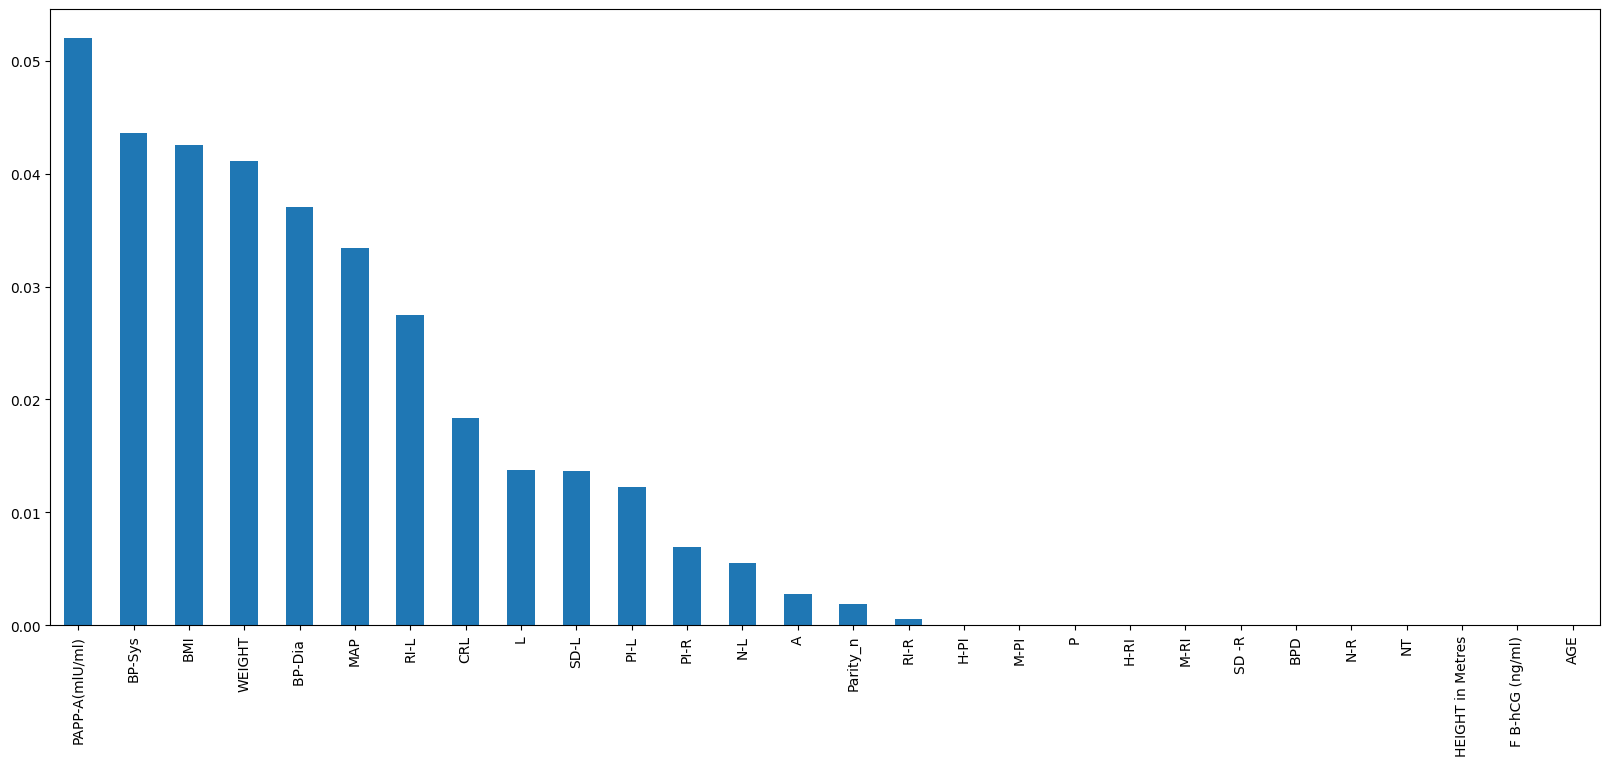

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
a=clf.feature_importances_

In [25]:
a = pd.Series(a)
a.index = X_train.columns
a.sort_values(ascending=False)

BP-Sys              0.115743
BMI                 0.110557
MAP                 0.107468
AGE                 0.070923
PAPP-A(mlU/ml)      0.067238
PI-R                0.064512
HEIGHT in Metres    0.055039
BP-Dia              0.046467
CRL                 0.044692
PI-L                0.038653
NT                  0.036901
F B-hCG (ng/ml)     0.035795
SD-L                0.028601
BPD                 0.025758
Parity_n            0.025426
RI-R                0.025110
WEIGHT              0.018460
H-RI                0.014953
RI-L                0.011367
M-RI                0.011228
P                   0.008888
SD -R               0.008868
L                   0.008279
M-PI                0.007420
N-L                 0.007222
A                   0.004434
H-PI                0.000000
N-R                 0.000000
dtype: float64

<Axes: >

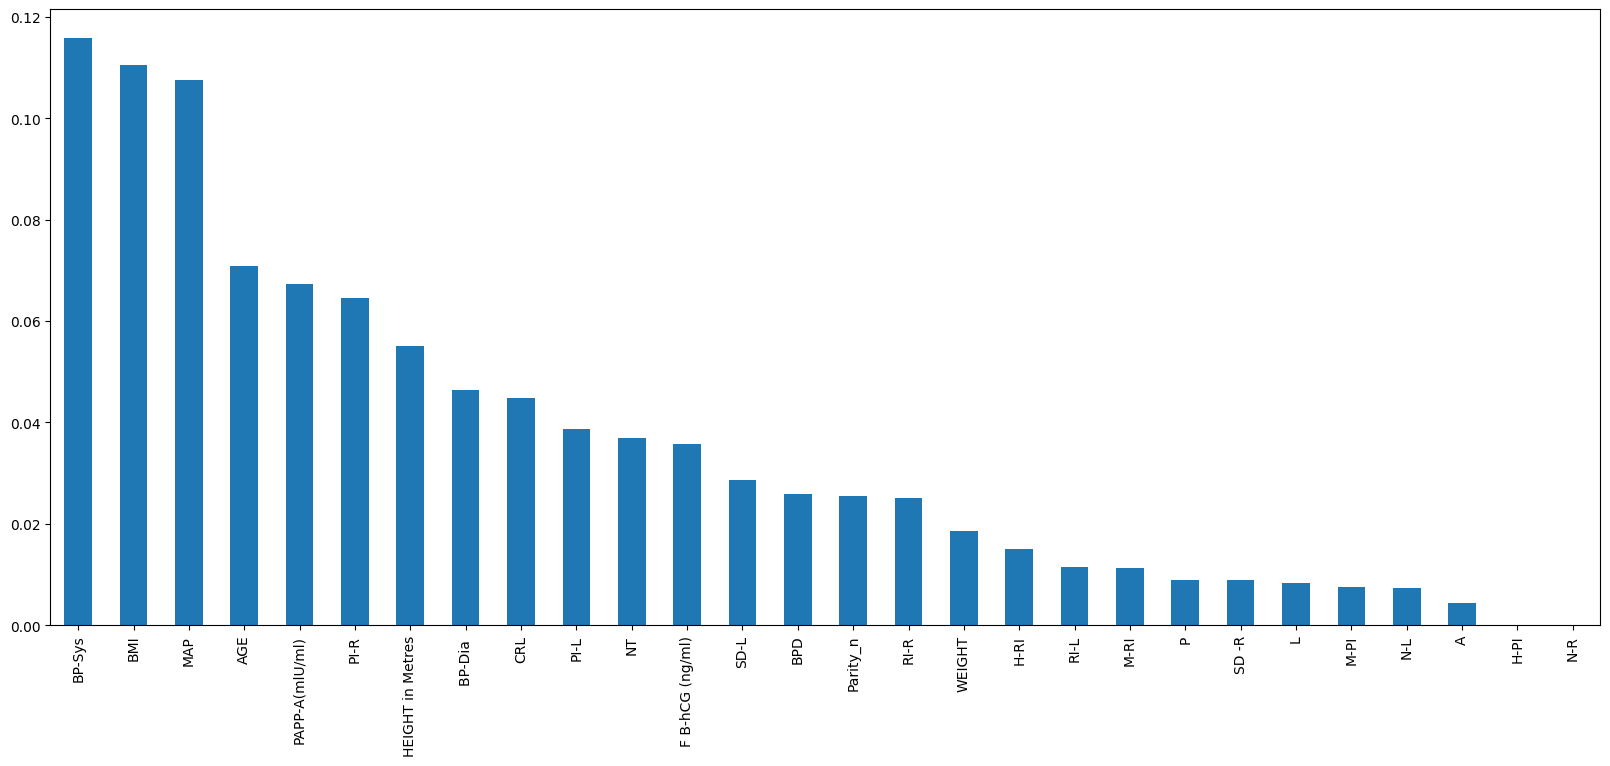

In [26]:
a.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [27]:
#                              Feature Selection Using Random Forset

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rf=model.feature_importances_

In [30]:
rf = pd.Series(rf)
rf.index = X_train.columns
rf.sort_values(ascending=False)

PAPP-A(mlU/ml)      0.084090
BMI                 0.075311
MAP                 0.073261
BP-Sys              0.072855
WEIGHT              0.065510
BP-Dia              0.050594
CRL                 0.044910
BPD                 0.041908
F B-hCG (ng/ml)     0.038875
NT                  0.036523
AGE                 0.035680
H-PI                0.034309
HEIGHT in Metres    0.032767
SD-L                0.032130
M-PI                0.031575
PI-L                0.031483
SD -R               0.031391
PI-R                0.029157
RI-L                0.027195
H-RI                0.026205
RI-R                0.026011
M-RI                0.023084
Parity_n            0.017801
A                   0.009768
P                   0.007934
N-L                 0.007359
L                   0.006809
N-R                 0.005505
dtype: float64

<Axes: >

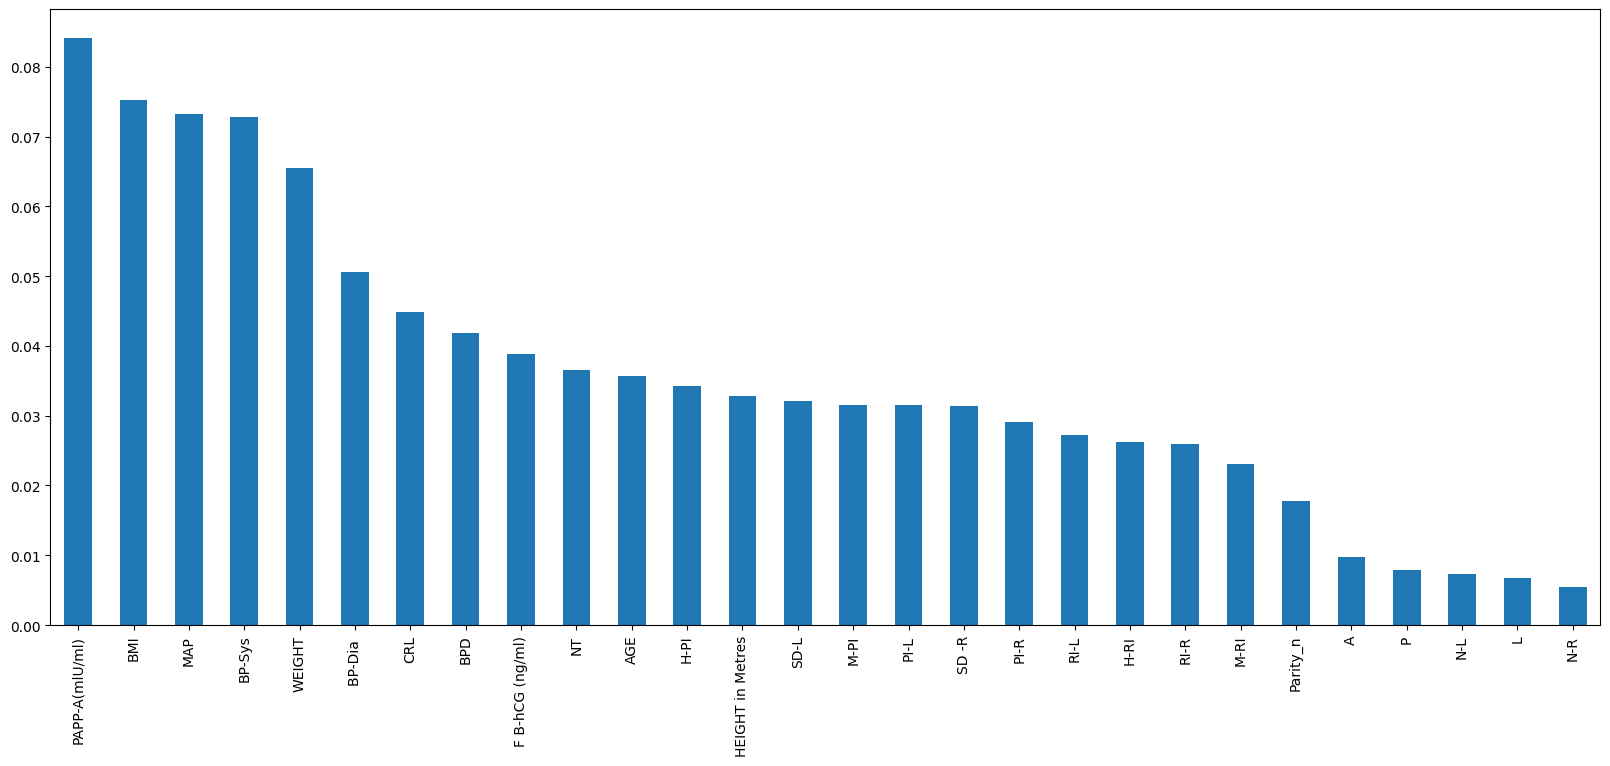

In [31]:
rf.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [32]:
#                                  Now using regression

In [33]:
from sklearn.feature_selection import mutual_info_regression
mutual_reg = mutual_info_regression(X_train, y_train)
mutual_reg

array([0.03300032, 0.        , 0.        , 0.        , 0.0169341 ,
       0.01452363, 0.03874356, 0.04754032, 0.03259565, 0.04517466,
       0.02020969, 0.02711095, 0.0095622 , 0.02570985, 0.        ,
       0.        , 0.01271961, 0.004391  , 0.00349076, 0.        ,
       0.        , 0.        , 0.01375933, 0.        , 0.02472719,
       0.06968627, 0.00439406, 0.01779847])

In [34]:
mutual_reg = pd.Series(mutual_reg)
mutual_reg.index = X_train.columns
mutual_reg.sort_values(ascending=False)

PAPP-A(mlU/ml)      0.069686
BP-Sys              0.047540
MAP                 0.045175
BMI                 0.038744
AGE                 0.033000
BP-Dia              0.032596
NT                  0.027111
PI-R                0.025710
N-L                 0.024727
CRL                 0.020210
Parity_n            0.017798
WEIGHT              0.016934
HEIGHT in Metres    0.014524
SD-L                0.013759
M-PI                0.012720
BPD                 0.009562
F B-hCG (ng/ml)     0.004394
RI-R                0.004391
RI-L                0.003491
L                   0.000000
A                   0.000000
N-R                 0.000000
H-RI                0.000000
SD -R               0.000000
M-RI                0.000000
H-PI                0.000000
P                   0.000000
PI-L                0.000000
dtype: float64

<Axes: >

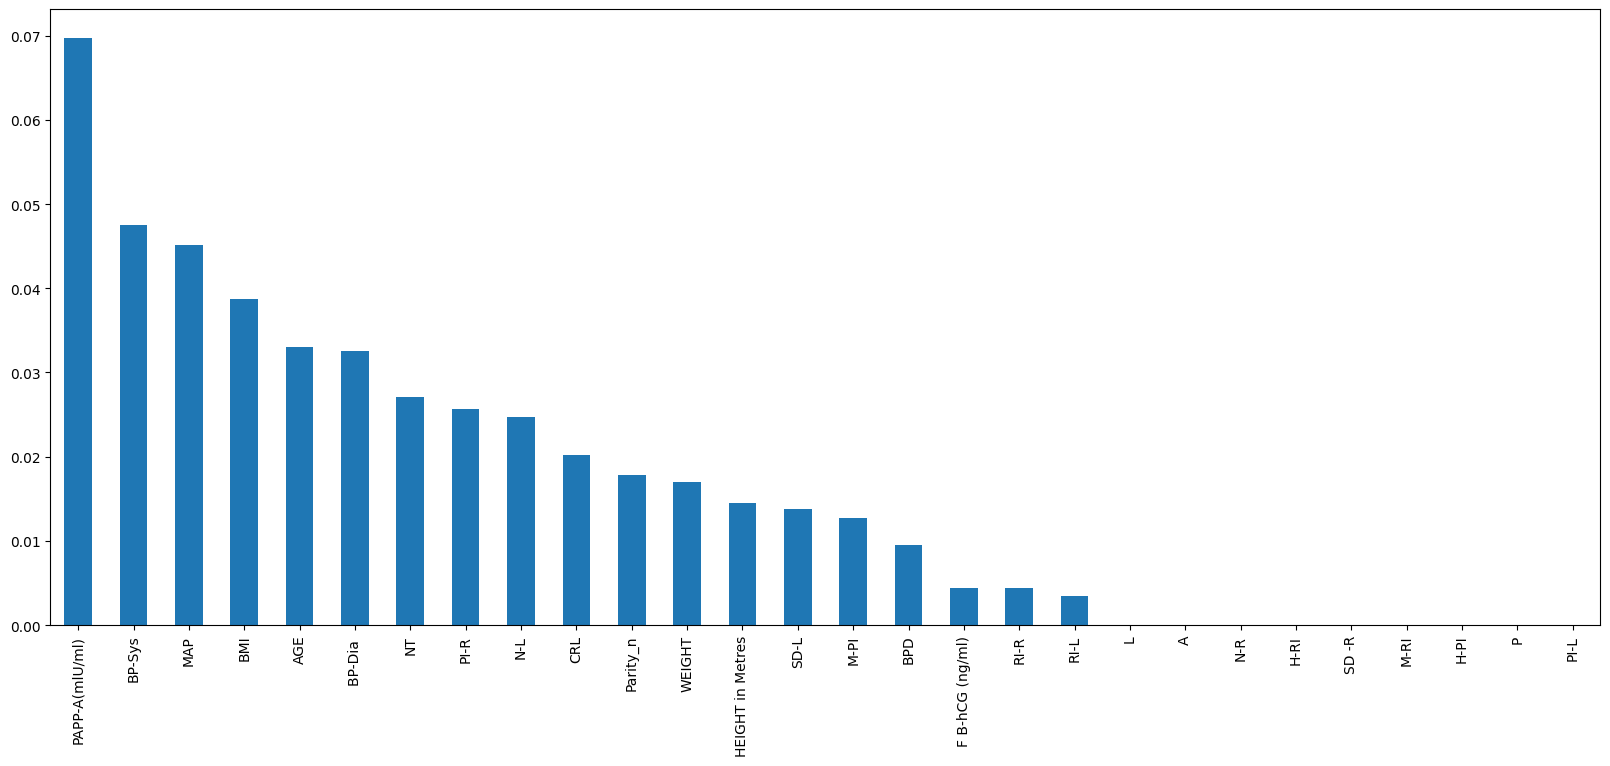

In [35]:
mutual_reg.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Evaluating Model

In [36]:
from sklearn import tree
DTclassifier =tree.DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       176
           1       0.22      0.28      0.24        29
           2       0.00      0.00      0.00         3

    accuracy                           0.74       208
   macro avg       0.36      0.37      0.36       208
weighted avg       0.76      0.74      0.75       208

[[145  28   3]
 [ 21   8   0]
 [  2   1   0]]

Decision Tree accuracy: 73.56%


In [37]:
RFclassifier = RandomForestClassifier(n_estimators=50)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       176
           1       0.55      0.21      0.30        29
           2       0.00      0.00      0.00         3

    accuracy                           0.85       208
   macro avg       0.47      0.39      0.41       208
weighted avg       0.81      0.85      0.82       208

[[171   5   0]
 [ 23   6   0]
 [  3   0   0]]

Random Forest accuracy: 85.10%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       176
           1       1.00      0.07      0.13        29
           2       0.00      0.00      0.00         3

    accuracy                           0.86       208
   macro avg       0.62      0.36      0.35       208
weighted avg       0.86      0.86      0.80       208

[[176   0   0]
 [ 27   2   0]
 [  3   0   0]]

LR accuracy: 85.58%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

In [39]:
SVMclassifier = SVC()
SVMclassifier.fit(X_train, y_train)

y_pred = SVMclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

from sklearn.metrics import accuracy_score
SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy: {:.2f}%'.format(SVMAcc*100))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       176
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00         3

    accuracy                           0.85       208
   macro avg       0.28      0.33      0.31       208
weighted avg       0.72      0.85      0.78       208

[[176   0   0]
 [ 29   0   0]
 [  3   0   0]]

SVM accuracy: 84.62%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
df.Result.value_counts(dropna=False)

0    884
1    137
2     17
Name: Result, dtype: int64

<BarContainer object of 4 artists>

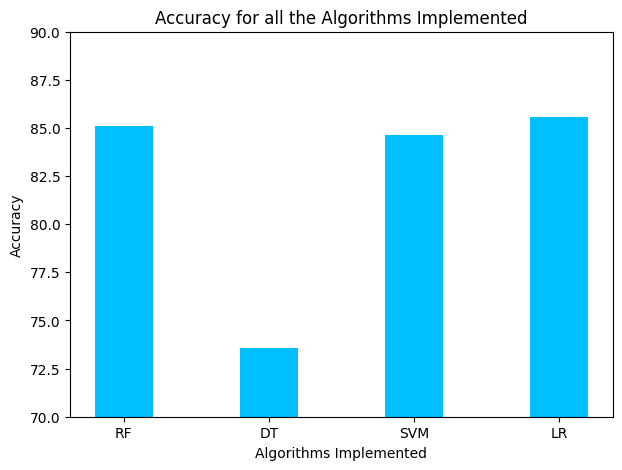

In [54]:
compare1 = pd.DataFrame({'Model': ['RF', 'DT',
                                  'SVM','LR'],
                        'Accuracy': [RFAcc*100,DTAcc*100, SVMAcc*100,LRAcc*100]})
fig = plt.figure(figsize = (7,5))
plt.setp(plt.gca(), ylim=(70, 90))
plt.xlabel("Algorithms Implemented")
plt.ylabel("Accuracy")
plt.title("Accuracy for all the Algorithms Implemented")

plt.bar(compare1['Model'], compare1['Accuracy'], color ='deepskyblue',
        width = 0.4)
